In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

from matplotlib import pyplot as plt

from common import hallmark as hm
from common import viz

In [2]:
pf = hm.ParaFrame('cache/Illinois_thermal_w{win:d}/{mag}a{aspin:g}_i{inc:d}/sed_Rh{Rhigh:d}.h5')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

Rhigh [  1  10  40 160]
aspin [-0.94 -0.5   0.    0.5   0.94]
win [3 4 5]
mag ['M' 'S']
inc [ 10  30  50  70  90 110 130 150 170]


In [3]:
def readsed(f):
    with h5py.File(f) as h:
        time = h['time'][:]
        nu   = h['nu'  ][:]
        knd  = h['knd' ][:]
        avg  = h['avg' ][:]
        # err  = h['err' ][:]
        rlz  = h['len' ][:]

    if not all(rlz == 16):
        print('WARNING: less than 16 realizations:', f)
        
    return nu, np.mean(avg[:,:,0],axis=0), knd

3 -0.94 M 1
3 -0.94 M 10
3 -0.94 M 40
3 -0.94 M 160
3 -0.94 S 1
3 -0.94 S 10
3 -0.94 S 40
3 -0.94 S 160
3 -0.5 M 1
3 -0.5 M 10
3 -0.5 M 40
3 -0.5 M 160
3 -0.5 S 1
3 -0.5 S 10
3 -0.5 S 40
3 -0.5 S 160
3 0.0 M 1
3 0.0 M 10
3 0.0 M 40
3 0.0 M 160
3 0.0 S 1
3 0.0 S 10
3 0.0 S 40
3 0.0 S 160
3 0.5 M 1
3 0.5 M 10
3 0.5 M 40
3 0.5 M 160
3 0.5 S 1
3 0.5 S 10
3 0.5 S 40
3 0.5 S 160
3 0.94 M 1
3 0.94 M 10
3 0.94 M 40
3 0.94 M 160
3 0.94 S 1
3 0.94 S 10
3 0.94 S 40
3 0.94 S 160
4 -0.94 M 1
4 -0.94 M 10
4 -0.94 M 40
4 -0.94 M 160
4 -0.94 S 1
4 -0.94 S 10
4 -0.94 S 40
4 -0.94 S 160
4 -0.5 M 1
4 -0.5 M 10
4 -0.5 M 40
4 -0.5 M 160
4 -0.5 S 1
4 -0.5 S 10
4 -0.5 S 40
4 -0.5 S 160
4 0.0 M 1
4 0.0 M 10
4 0.0 M 40
4 0.0 M 160
4 0.0 S 1
4 0.0 S 10
4 0.0 S 40
4 0.0 S 160
4 0.5 M 1
4 0.5 M 10
4 0.5 M 40
4 0.5 M 160
4 0.5 S 1
4 0.5 S 10
4 0.5 S 40
4 0.5 S 160
4 0.94 M 1
4 0.94 M 10
4 0.94 M 40
4 0.94 M 160
4 0.94 S 1
4 0.94 S 10
4 0.94 S 40
4 0.94 S 160
5 -0.94 M 1
5 -0.94 M 10
5 -0.94 M 40
5 -0.94 M 160
5 -0

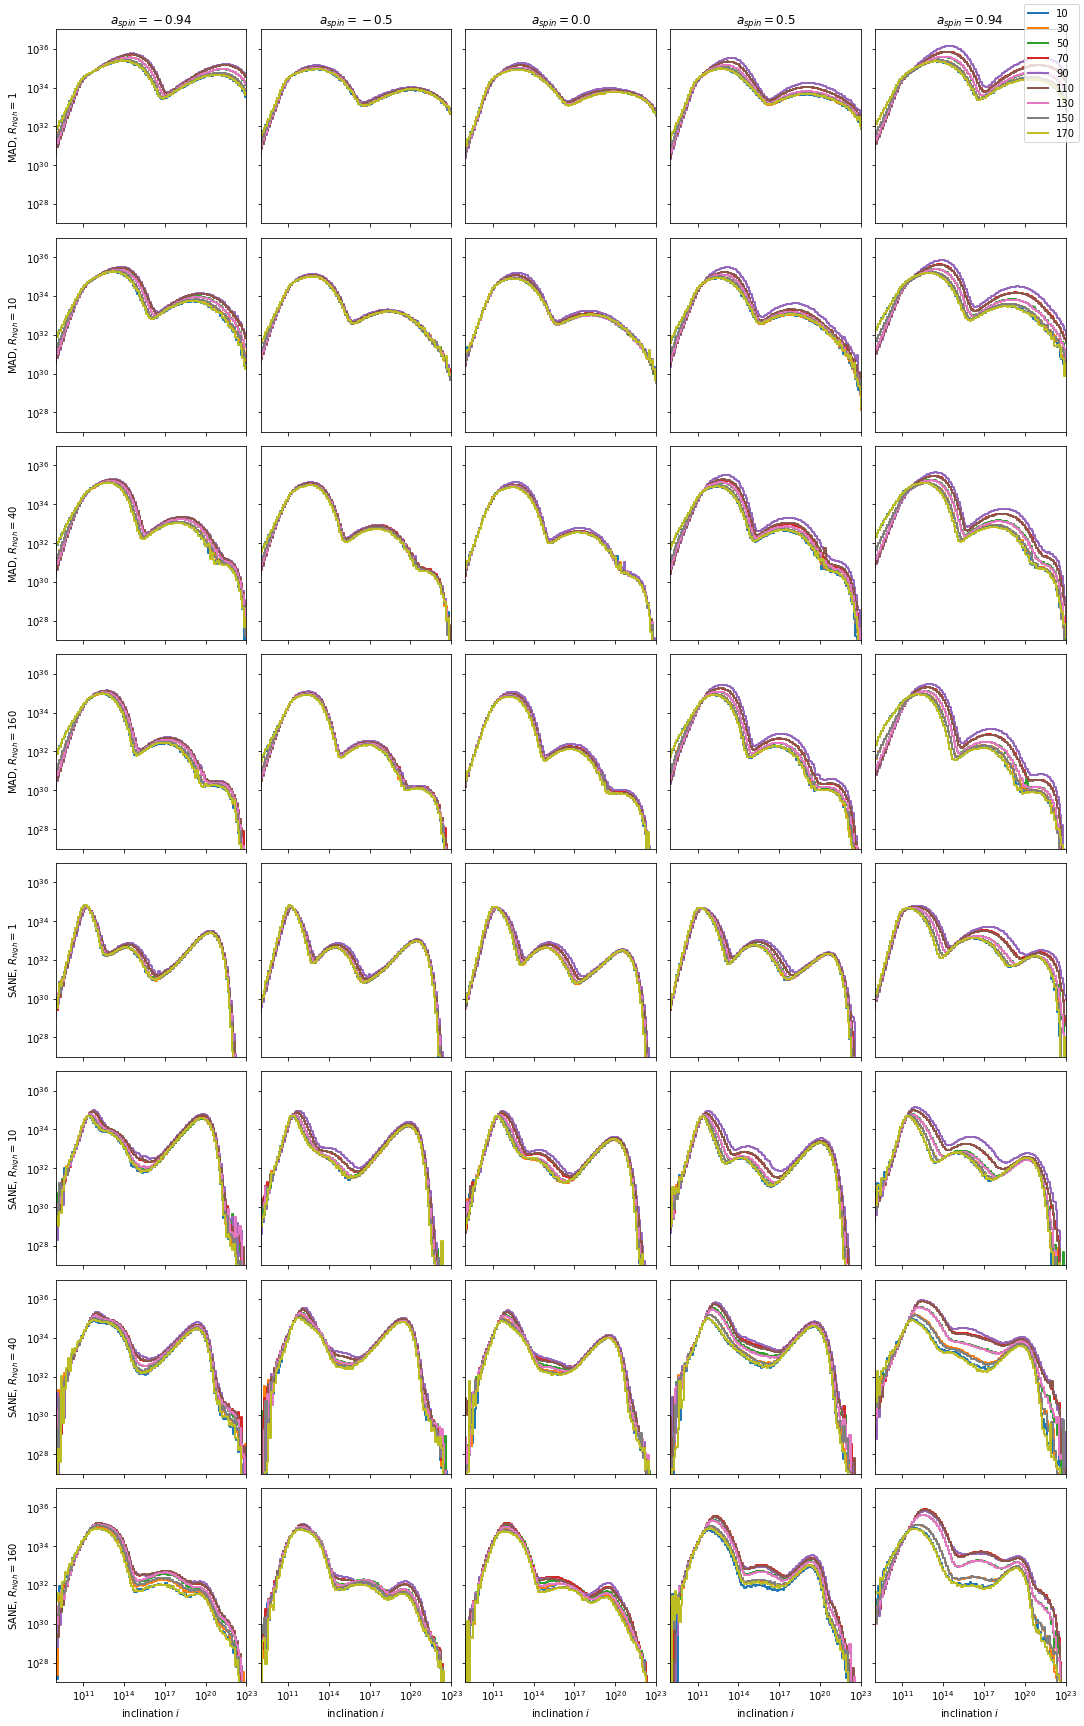

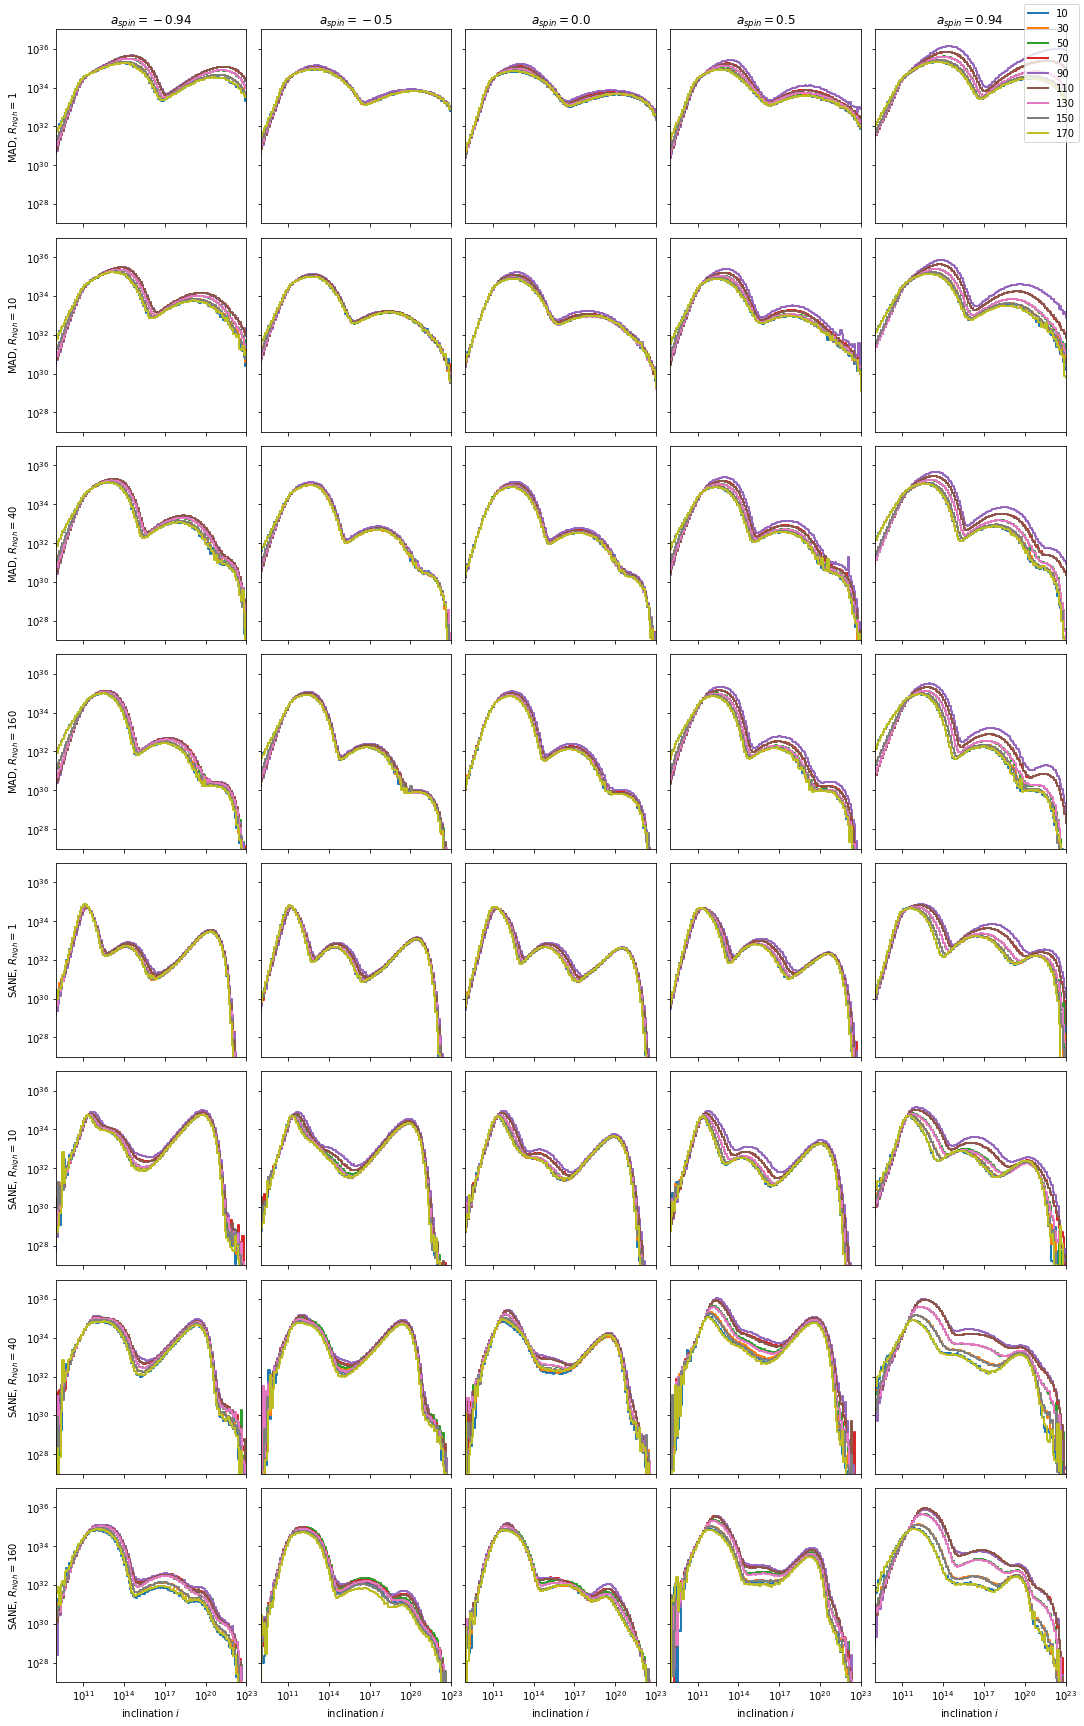

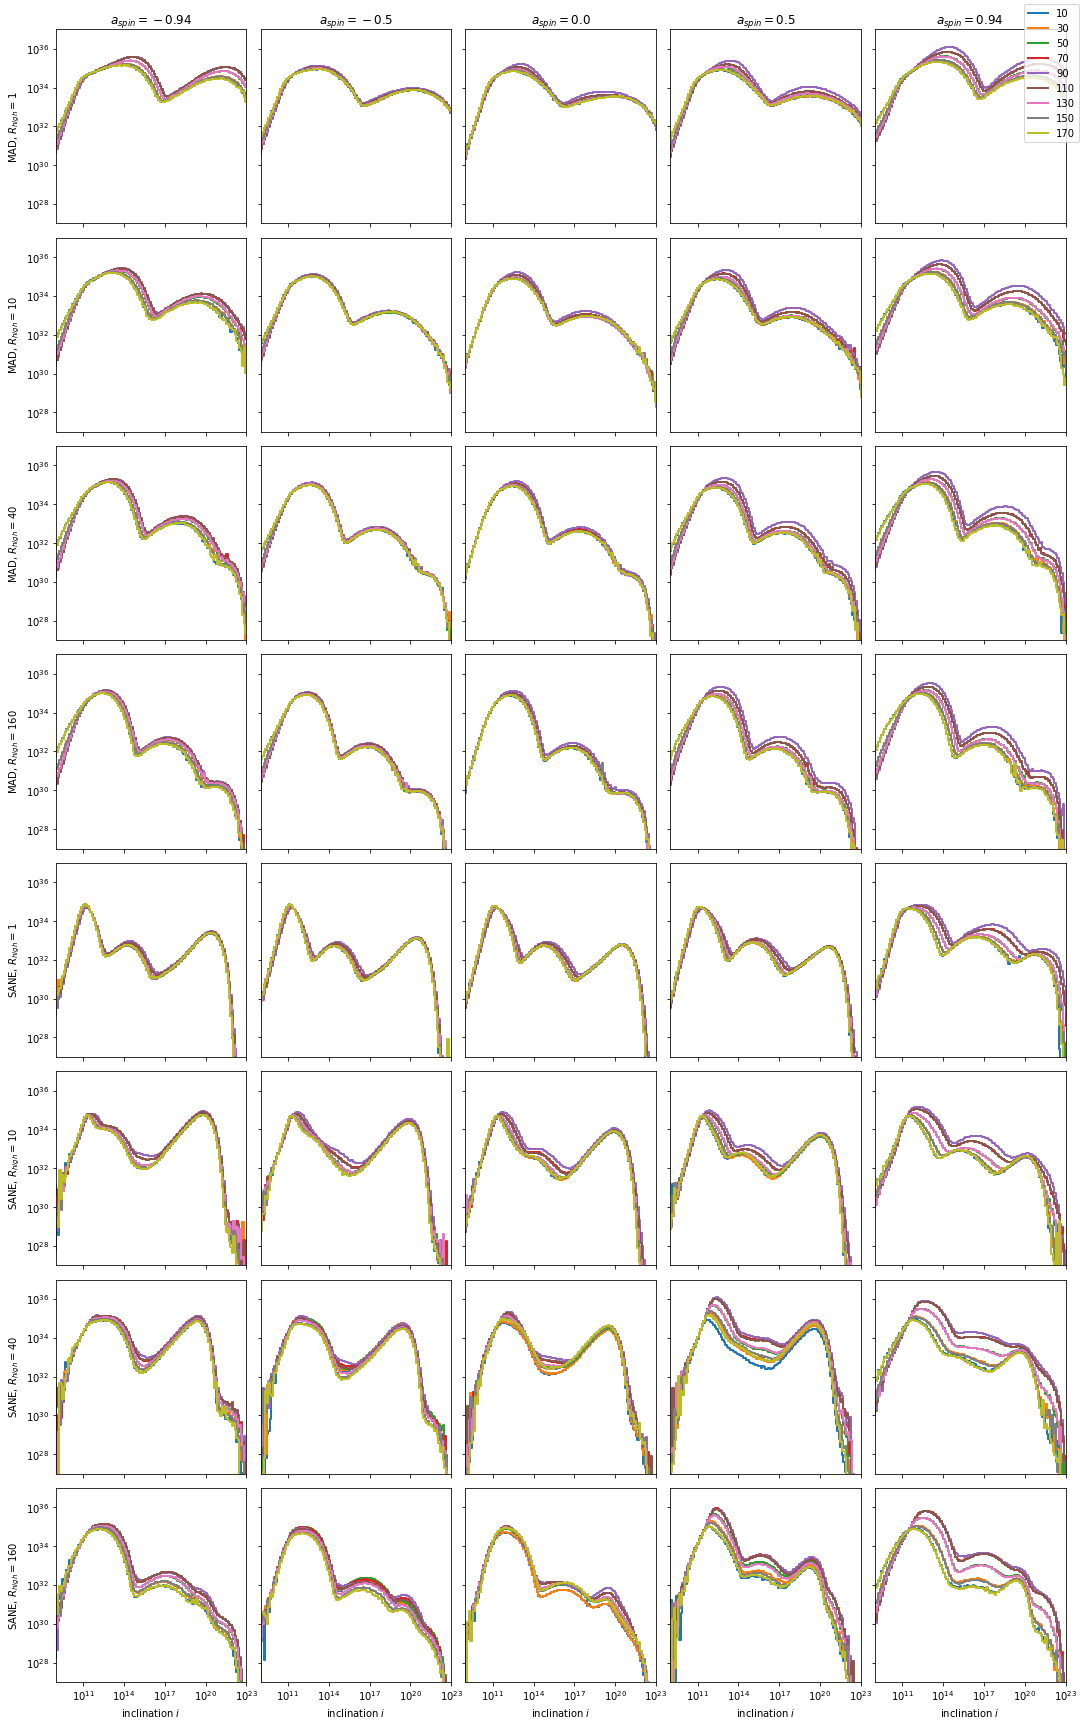

In [6]:
for w in win:
    fig, axes = plt.subplots(8, 5, figsize=(15,24), sharex=True, sharey=True)

    for c, a in enumerate(aspin):
        for r1, m in enumerate(mag):
            for r2, Rh in enumerate(Rhigh):
                print(w, a, m, Rh)
                r  = r1 * 4 + r2
                ax = axes[r][c]
        
                sel = pf(aspin=a)(mag=m)(Rhigh=Rh)(win=w)
                if len(sel) != 9:
                    print('WARNING: too many matchingn tables')

                for i, (j, row) in enumerate(sel.sort_values('inc').iterrows()):
                    nu, avg, knd = readsed(row.path)
                    if c == 0 and r == 0:
                        viz.step(ax, nu, avg, color=f'C{i}', label=[row.inc])
                    else:
                        viz.step(ax, nu, avg, color=f'C{i}')
                    
                ax.set_xlim(1e9,  1e23)
                ax.set_ylim(1e27, 1e37)

                if r == 0:
                    ax.set_title(f'$a_{{spin}} = {a}$')
                elif r == 7:
                    ax.set_xlabel('inclination $i$')
                if c == 0:
                    ax.set_ylabel(f'{"MAD" if m == "M" else "SANE"}, $R_{{high}} = {Rh}$')
    
    fig.tight_layout()
    fig.legend()
    fig.savefig(f'output/plot/sedgrid_Illinois_thermal_w{w:d}.pdf')